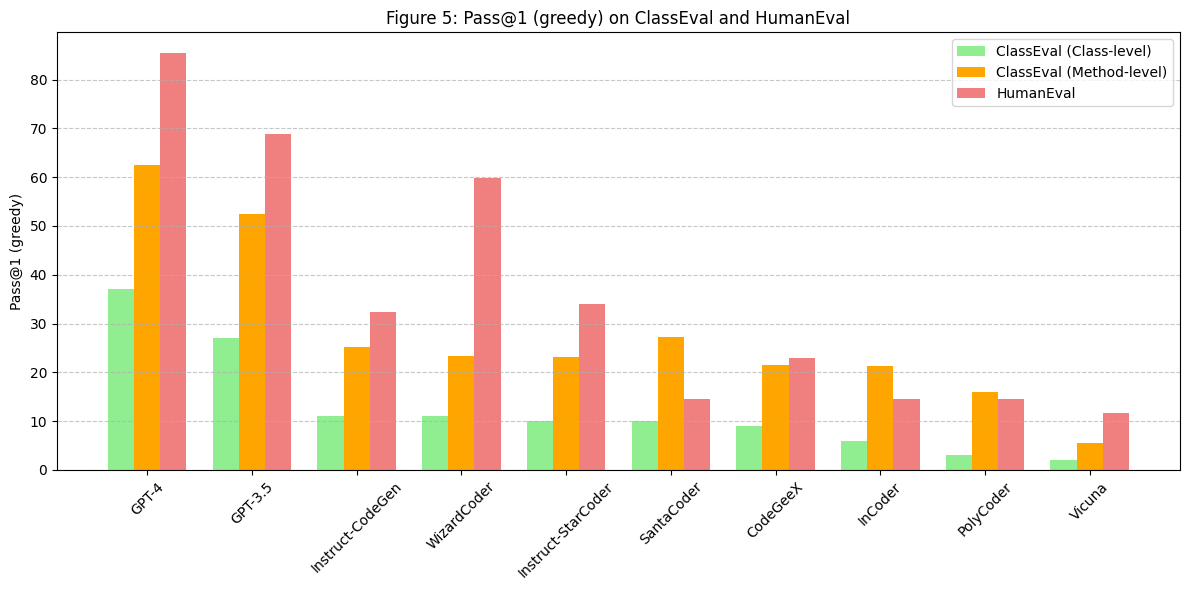

In [ ]:
# Plotting code for ClassEval vs HumanEval Pass@1
import matplotlib.pyplot as plt

# Data
models = [
    "GPT-4", "GPT-3.5", "WizardCoder", "SantaCoder", "GPT-o4-mini", "LLama3.1-8b", "Deepseek-r1-distill-llama-70b", "Llama4-maverick-instruct"
]
class_level = [
    0.31,  # GPT-4 - no data provided, placeholder
    0.24,   # GPT-3.5 - no data provided, placeholder
    0.08,  # WizardCoder
    0.0,   # SantaCoder
    0.4,   # GPT-o4-mini
    0.19,  # LLama3.1-8b
    0.35,  # Deepseek-r1-distill-llama-70b
    0.34   # Llama4-maverick-instruct
]

method_level = [
    0.601593625498008,   # GPT-4
    0.5378486055776892,  # GPT-3.5 - no data provided, placeholder
    0.1752988047808765,  # WizardCoder
    0.00796812749003984, # SantaCoder
    0.7350597609561753,  # GPT-o4-mini
    0.47410358565737054, # LLama3.1-8b
    0.6354581673306773,  # Deepseek-r1-distill-llama-70b
    0.6952191235059761   # Llama4-maverick-instruct
]
human_eval = [
    0.884,   # GPT-4
    0.732,  # GPT-3.5 - no data provided, placeholder
    0.598,  # WizardCoder
    0.146, # SantaCoder
    0.0,  # GPT-o4-mini
    0.695, # LLama3.1-8b
    0.0,  # Deepseek-r1-distill-llama-70b
    0.0   # Llama4-maverick-instruct
]
big_code_bench_full = [
    0.516,   # GPT-4 - no data provided, placeholder
    0.449,   # GPT-3.5 - no data provided, placeholder
    0.0,   # WizardCoder - no data provided, placeholder
    0.0,   # SantaCoder - no data provided, placeholder
    0.0,   # GPT-o4-mini - no data provided, placeholder
    0.366,   # LLama3.1-8b - no data provided, placeholder
    0.426,   # Deepseek-r1-distill-llama-70b - no data provided, placeholder
    0.555    # Llama4-maverick-instruct - no data provided, placeholder
]
 

# Plotting
x = range(len(models))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar([p - width for p in x], class_level, width=width, label='ClassEval (Class-level)', color='lightgreen')
plt.bar(x, method_level, width=width, label='ClassEval (Method-level)', color='orange')
plt.bar([p + width for p in x], human_eval, width=width, label='HumanEval', color='lightcoral')

# Labels and Title
plt.xticks(x, models, rotation=45)
plt.ylabel('Pass@1 (greedy)')
plt.title('Figure 5: Pass@1 (greedy) on ClassEval and HumanEval')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [21]:
import json
import pandas as pd

# === STEP 1: Provide JSON file path ===
file_path = '/content/pass_at_k.json'  # <-- change this to your actual path

with open(file_path) as f:
    pass_k_data = json.load(f)

# === STEP 2: Extract and pivot tables per domain ===
def extract_pivoted_domain_tables(pass_k_data):
    domain_data = {"C": [], "H": [], "I": []}

    for pass_k in ["pass_1", "pass_3", "pass_5"]:
        k = pass_k.split("_")[1]
        for model_key, metrics in pass_k_data.get(pass_k, {}).items():
            for suffix in ["_C", "_H", "_I"]:
                if suffix in model_key:
                    domain = suffix.strip("_")
                    model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
                    break
            else:
                continue

            domain_data[domain].append({
                "Model": model,
                f"Class@{k}": round(metrics.get("class_success", 0.0) * 100, 1),
                f"Method@{k}": round(metrics.get("fun_success", 0.0) * 100, 1)
            })

    pivoted_tables = {}
    for domain, rows in domain_data.items():
        df = pd.DataFrame(rows)
        df = df.groupby("Model").first().reset_index()

        # Ensure consistent column order
        ordered_cols = ["Model", "Method@1", "Method@3", "Method@5", "Class@1", "Class@3", "Class@5"]
        existing_cols = [col for col in ordered_cols if col in df.columns]
        df = df[existing_cols]

        pivoted_tables[domain] = df.sort_values("Model")

    return pivoted_tables

# === STEP 3: Display all domain tables ===
pivoted_tables = extract_pivoted_domain_tables(pass_k_data)

for domain, df in pivoted_tables.items():
    print(f"\n📌 Domain {domain}")
    display(df)



📌 Domain C


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGLM,8.2,11.2,12.4,1.4,2.6,3.0
1,CodeGeeX,20.7,25.2,26.9,3.8,4.6,5.0
2,GPT-3.5,51.2,55.0,56.5,18.2,21.3,22.0
3,GPT-4,57.7,62.3,64.1,29.6,34.1,36.0
4,Incoder,20.6,25.1,26.5,3.4,3.9,4.0
5,Instruct-CodeGen,20.2,25.7,27.9,5.8,7.2,8.0
6,Instruct-StarCoder,22.8,29.3,31.9,9.0,12.4,14.0
7,PolyCoder,10.2,13.5,14.8,2.6,3.0,3.0
8,SantaCoder,21.0,26.0,28.3,3.2,3.6,4.0
9,Vicuna,14.5,18.8,21.0,2.6,3.0,3.0



📌 Domain H


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGLM,5.8,6.8,7.2,1.0,1.9,2.0
1,CodeGeeX,1.1,1.4,1.6,1.0,1.0,1.0
2,GPT-3.5,50.4,59.0,61.1,29.6,34.9,36.0
3,GPT-4,62.8,67.4,68.5,37.6,41.3,42.0
4,Incoder,12.1,16.6,18.6,2.6,3.5,4.0
5,Instruct-CodeGen,17.1,23.8,27.1,7.4,9.8,11.0
6,Instruct-StarCoder,23.1,26.5,27.7,10.2,12.7,14.0
7,PolyCoder,0.1,0.2,0.4,0.0,0.0,0.0
8,SantaCoder,3.0,4.3,5.0,1.0,2.2,3.0
9,Vicuna,6.9,11.5,14.4,1.4,1.9,2.0



📌 Domain I


,Model,Method@1,Method@3,Method@5,Class@1,Class@3,Class@5
0,ChatGLM,7.7,11.0,12.0,1.2,1.9,2.0
1,CodeGeeX,21.2,27.1,29.5,7.2,9.4,10.0
2,GPT-3.5,52.9,57.3,59.7,25.6,30.2,32.0
3,GPT-4,52.3,57.6,59.5,26.2,30.7,33.0
4,Incoder,21.1,26.5,29.1,6.2,7.6,8.0
5,Instruct-CodeGen,24.9,34.3,37.1,8.2,12.3,13.0
6,Instruct-StarCoder,20.4,26.7,30.1,8.4,11.3,13.0
7,PolyCoder,13.2,17.5,19.6,1.4,2.2,3.0
8,SantaCoder,27.7,33.0,34.9,8.6,9.9,10.0
9,Vicuna,11.0,15.8,18.4,3.0,3.6,4.0


In [22]:
# This regenerates per_domain_tables if not in memory
def extract_per_domain_tables(pass_k_data):
    domain_tables = {"C": [], "H": [], "I": []}

    for pass_k in ["pass_1", "pass_3", "pass_5"]:
        for model_key, metrics in pass_k_data.get(pass_k, {}).items():
            for suffix in ["_C", "_H", "_I"]:
                if suffix in model_key:
                    domain = suffix.strip("_")
                    model = model_key.replace(suffix, "").replace("(greedy)", "").strip()
                    break
            else:
                continue

            domain_tables[domain].append({
                "Model": model,
                "Pass@k": pass_k,
                "Class Success (%)": round(metrics.get("class_success", 0.0) * 100, 1),
                "Method Success (%)": round(metrics.get("fun_success", 0.0) * 100, 1)
            })

    return {
        domain: pd.DataFrame(data).sort_values(by=["Model", "Pass@k"])
        for domain, data in domain_tables.items()
    }

per_domain_tables = extract_per_domain_tables(pass_k_data)


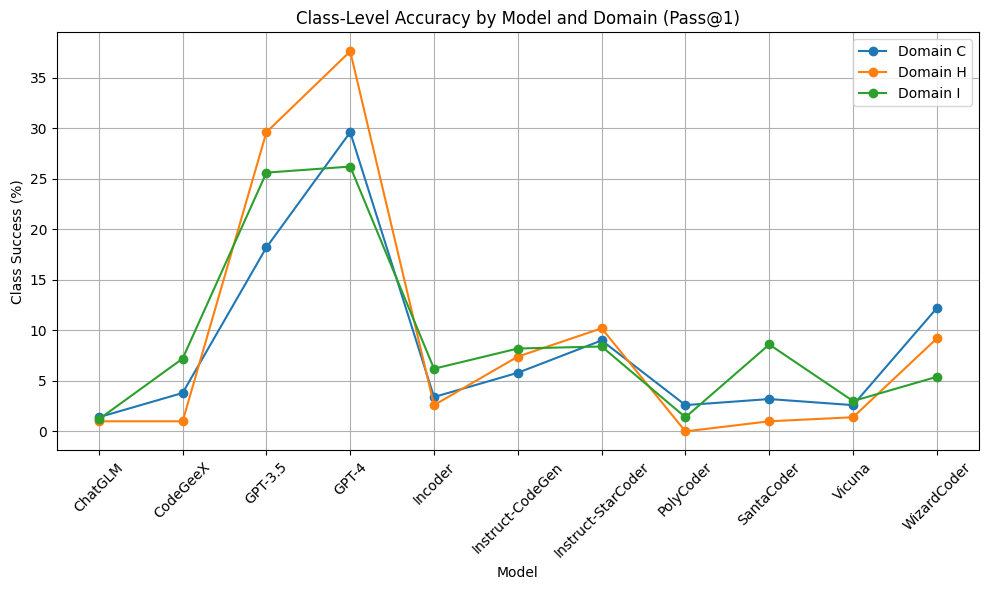

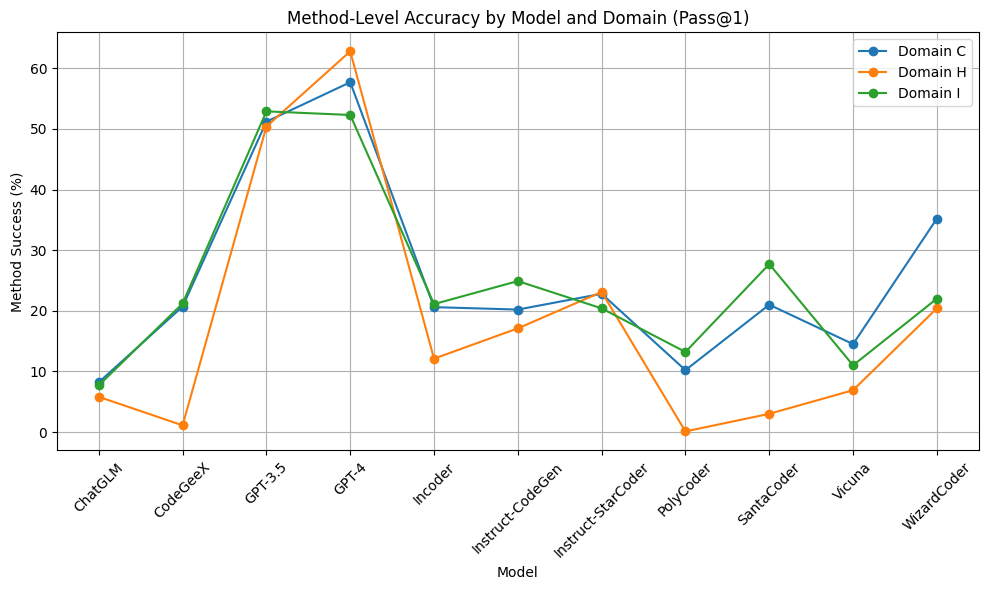

In [23]:
import matplotlib.pyplot as plt

def prepare_line_chart_data(domain_tables, metric="Class Success (%)"):
    domain_data = {}
    for domain, df in domain_tables.items():
        pivot = df[df["Pass@k"] == "pass_1"].pivot(index="Model", columns="Pass@k", values=metric)
        domain_data[domain] = pivot["pass_1"]
    return pd.DataFrame(domain_data).sort_index()

# Line plot: Class-level
class_df = prepare_line_chart_data(per_domain_tables, "Class Success (%)")
plt.figure(figsize=(10, 6))
for domain in class_df.columns:
    plt.plot(class_df.index, class_df[domain], marker='o', label=f"Domain {domain}")
plt.title("Class-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Class Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Line plot: Method-level
method_df = prepare_line_chart_data(per_domain_tables, "Method Success (%)")
plt.figure(figsize=(10, 6))
for domain in method_df.columns:
    plt.plot(method_df.index, method_df[domain], marker='o', label=f"Domain {domain}")
plt.title("Method-Level Accuracy by Model and Domain (Pass@1)")
plt.xlabel("Model")
plt.ylabel("Method Success (%)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
